In [7]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# load in directories
from experiment_code.constants import Defaults
from experiment_code.visualization import visualize
from experiment_code import preprocess

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#provide concatenated dataset
dataframe = preprocess.concat_peele_baldwin()
dataframe

,CoRT,cloze_probability,dataset,full_sentence,group,participant_id,version
0,1.0,0.47,peele,Little Gracie said the most boring place ever ...,NaN,1.18908e+06,V8
1,1.0,0.47,peele,Little Gracie said the most boring place ever ...,NaN,1.1891e+06,V8
2,4.0,0.47,peele,Little Gracie said the most boring place ever ...,NaN,1.19463e+06,V8
3,1.0,0.47,peele,Little Gracie said the most boring place ever ...,NaN,1.19464e+06,V8
5,3.0,0.40,peele,He was a sweet boy until he entered that school,NaN,1.18908e+06,V8
6,3.0,0.40,peele,He was a sweet boy until he entered that school,NaN,1.1891e+06,V8
7,3.0,0.40,peele,He was a sweet boy until he entered that school,NaN,1.19463e+06,V8
8,5.0,0.40,peele,He was a sweet boy until he entered that school,NaN,1.19464e+06,V8
10,1.0,0.63,peele,The sugar content in Ivy's cake was too high,NaN,1.18908e+06,V8
11,1.0,0.63,peele,The sugar content in Ivy's cake was too high,NaN,1.1891e+06,V8


In [2]:
_preprocess_peele(filename="gorilla_v3.csv","Peele_cloze_3.csv")

SyntaxError: positional argument follows keyword argument (<ipython-input-2-3bd9ace363b5>, line 1)

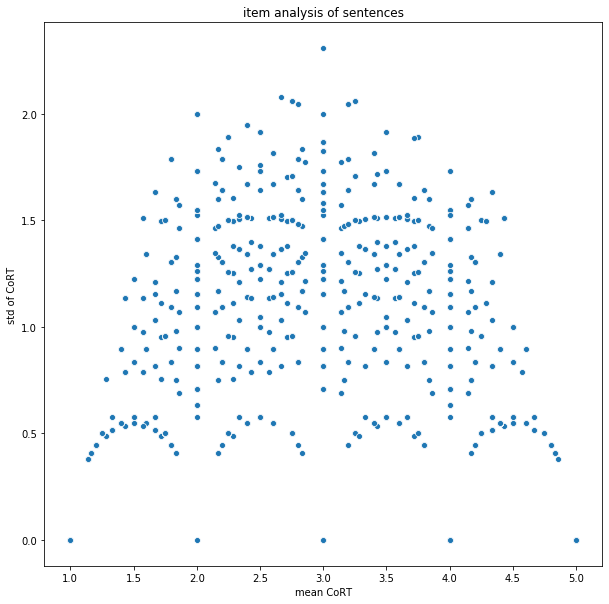

In [16]:
# play with visualize function: visualize.func(df)
visualize.item_analysis(dataframe)

In [4]:
# preprocess peele dataset
df = preprocess.preprocess_peele(bad_subjs=[1194659.0], cloze_filename="Peele_cloze_3.csv") # bad_subjs and cloze_filename are optional args (defined as **kwargs in the function)
# you can also run the command without any input - preprocess.preprocess_peele() but bad subjs won't be removed and cloze probs won't be added to the dataframe
df

,trial_dur_ms,display,iti_dur_ms,Task Version,Response,Participant_Private_ID,Reaction Time,version,Zone_Type,Experiment Version,...,Experiment ID,sentence,cloze probability,Log Hal Frequency,Phonological Neighbors,Semantic Neighborhood Density,Response Entropy,densityA,densityB,full_sentence
0,10000.0,trial,500.0,19.0,1.0,1189080.0,10000.6400,V8,response_rating_scale_likert,10.0,...,13726.0,Little Gracie said the most boring place ever ...,0.47,11.70,9,0.67,2.41,492,7,Little Gracie said the most boring place ever ...
1,10000.0,trial,500.0,19.0,1.0,1189097.0,10002.6760,V8,response_rating_scale_likert,10.0,...,13726.0,Little Gracie said the most boring place ever ...,0.47,11.70,9,0.67,2.41,492,7,Little Gracie said the most boring place ever ...
2,10000.0,trial,500.0,19.0,4.0,1194629.0,10004.5910,V8,response_rating_scale_likert,10.0,...,13726.0,Little Gracie said the most boring place ever ...,0.47,11.70,9,0.67,2.41,492,7,Little Gracie said the most boring place ever ...
3,10000.0,trial,500.0,19.0,1.0,1194644.0,10000.6560,V8,response_rating_scale_likert,10.0,...,13726.0,Little Gracie said the most boring place ever ...,0.47,11.70,9,0.67,2.41,492,7,Little Gracie said the most boring place ever ...
5,10000.0,trial,500.0,19.0,3.0,1189080.0,10000.4000,V8,response_rating_scale_likert,10.0,...,13726.0,He was a sweet boy until he entered that school,0.40,11.70,9,0.67,3.20,492,7,He was a sweet boy until he entered that school
6,10000.0,trial,500.0,19.0,3.0,1189097.0,10002.9610,V8,response_rating_scale_likert,10.0,...,13726.0,He was a sweet boy until he entered that school,0.40,11.70,9,0.67,3.20,492,7,He was a sweet boy until he entered that school
7,10000.0,trial,500.0,19.0,3.0,1194629.0,10004.4650,V8,response_rating_scale_likert,10.0,...,13726.0,He was a sweet boy until he entered that school,0.40,11.70,9,0.67,3.20,492,7,He was a sweet boy until he entered that school
8,10000.0,trial,500.0,19.0,5.0,1194644.0,9998.3330,V8,response_rating_scale_likert,10.0,...,13726.0,He was a sweet boy until he entered that school,0.40,11.70,9,0.67,3.20,492,7,He was a sweet boy until he entered that school
10,10000.0,trial,500.0,19.0,1.0,1189080.0,10000.1600,V8,response_rating_scale_likert,10.0,...,13726.0,The sugar content in Ivy's cake was too high,0.63,12.13,33,0.69,1.89,\N,\N,The sugar content in Ivy's cake was too high
11,10000.0,trial,500.0,19.0,1.0,1189097.0,10001.6580,V8,response_rating_scale_likert,10.0,...,13726.0,The sugar content in Ivy's cake was too high,0.63,12.13,33,0.69,1.89,\N,\N,The sugar content in Ivy's cake was too high


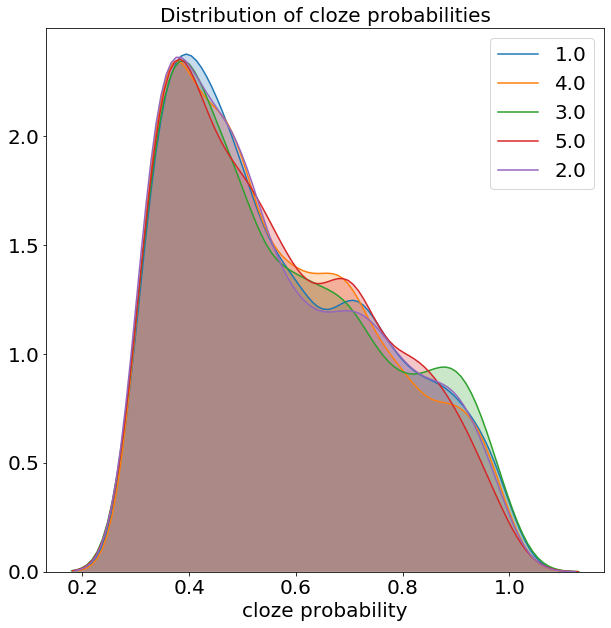

In [3]:
# do some visualization
# if you want to inspect the different methods (i.e. cloze_cort_distribution) on each function (i.e. visualize)
# type <function name>. and then hit tab
# if you want to know the args and kwargs (i.e. inputs) for each method
# type <function name>.<method name>?(i.e. visualize.cloze_cort_distribution?)
visualize.cloze_cort_distribution(df)